In [28]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('concrete_data.csv')

In [6]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
df.shape

(1030, 9)

In [8]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [12]:
x = df.drop(columns=['Strength'])
y = df.iloc[:, -1]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [30]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [31]:
np.round(x_train.describe(), 1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,824.0,824.0,824.0,824.0,824.0,824.0,824.0,824.0
mean,283.4,74.4,53.2,181.8,6.2,973.5,772.1,44.7
std,107.5,87.0,64.0,21.3,6.0,78.7,81.0,60.5
min,102.0,0.0,0.0,121.8,0.0,801.0,594.0,1.0
25%,192.0,0.0,0.0,164.9,0.0,932.0,726.8,12.2
50%,275.1,22.0,0.0,185.4,6.1,968.0,778.5,28.0
75%,359.9,144.8,118.3,192.0,10.1,1040.6,821.2,56.0
max,540.0,359.4,195.0,247.0,32.2,1145.0,992.6,365.0


In [ ]:
# applying linear regression without any transformation without scaling

lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

r2_score(y_test, y_pred)

0.6275531792314848

In [ ]:
# cross validation with cross val score without scaling

lr = LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring='r2'))

np.float64(0.4609940491662864)

In [43]:
# applying linear regression without any transformation with scaling

qq9 = LinearRegression()

qq9.fit(x_train_scaled, y_train)

y_predq = qq9.predict(x_test_scaled)

r2_score(y_test, y_predq)

0.6275531792314848

In [45]:
# cross validation with cross val score with scaling 

qq9 = LinearRegression()
np.mean(cross_val_score(qq9,x,y,scoring='r2'))

np.float64(0.4609940491662864)

In [ ]:
# without scaling

for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x=x_train[col], fill=True)
    plt.xlabel(col)
    plt.title(f'{col} - KDE (PDF)')
    
    plt.subplot(122)
    stats.probplot(x_train[col], dist='norm', plot=plt)
    plt.title(f'{col} - QQ Plot')
    
    plt.show()

In [ ]:
# with scaling

for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x=x_train_scaled[col], fill=True)
    plt.xlabel(col)
    plt.title(f'{col} - KDE (PDF)')
    
    plt.subplot(122)
    stats.probplot(x_train_scaled[col], dist='norm', plot=plt)
    plt.title(f'{col} - QQ Plot')
    
    plt.show()

In [42]:
# apply box - cox transform

pt = PowerTransformer(method='box-cox')

x_train_trans = pt.fit_transform(x_train + 0.000001)
x_test_trans = pt.transform(x_test + 0.000001)

pd.DataFrame({'cols':x_train.columns, 'box_cos_lambdas': pt.lambdas_})

,cols,box_cos_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [46]:
# applying lineat tranformation on tranformed data

lr2 = LinearRegression()

lr2.fit(x_train_trans, y_train)

y_pred2 = lr2.predict(x_test_trans)

r2_score(y_test, y_pred2)

0.8047825011028632

In [47]:
# using cross val on transformed data

pt = PowerTransformer(method='box-cox')

x_trans = pt.fit_transform(x+0.000001)

lr9 = LinearRegression()

np.mean(cross_val_score(lr9, x_trans, y, scoring='r2'))

np.float64(0.6662950327179041)

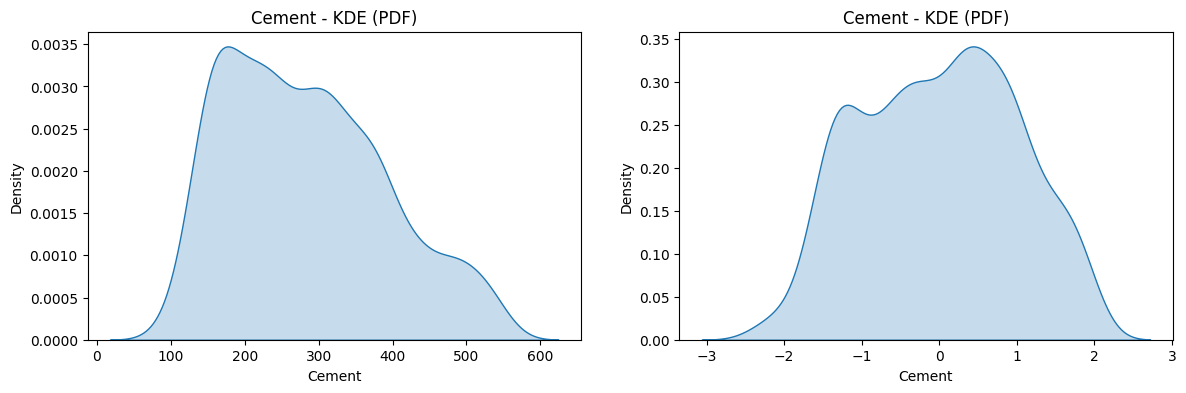

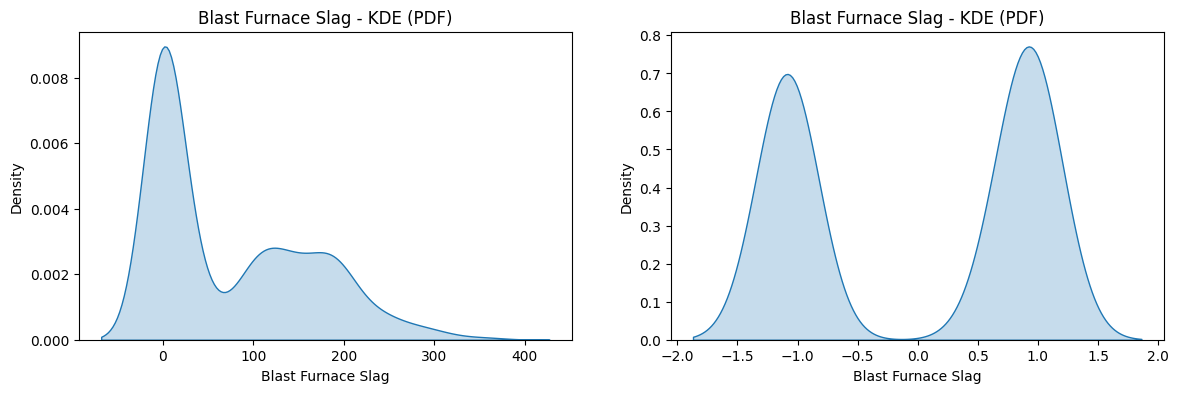

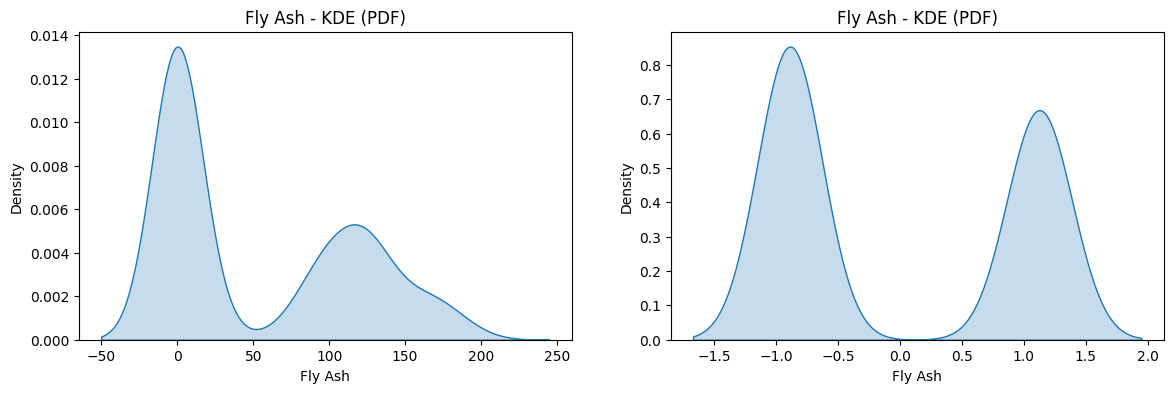

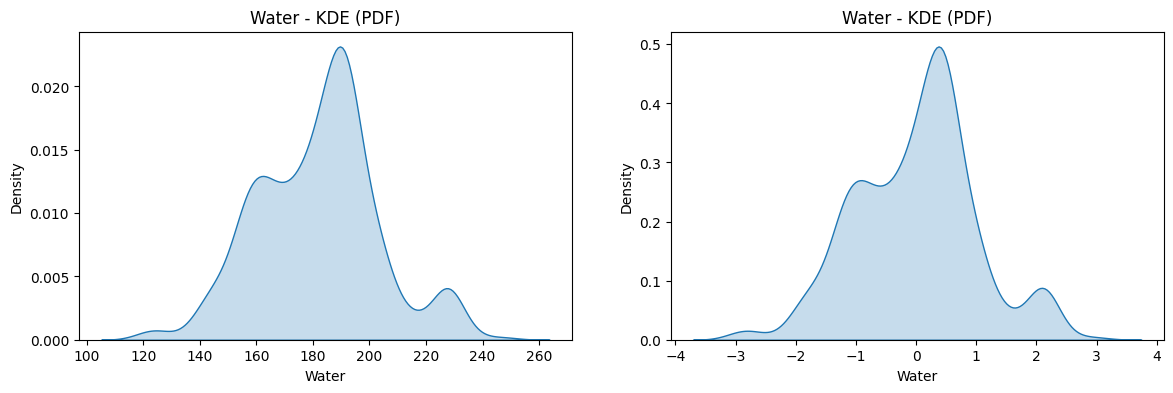

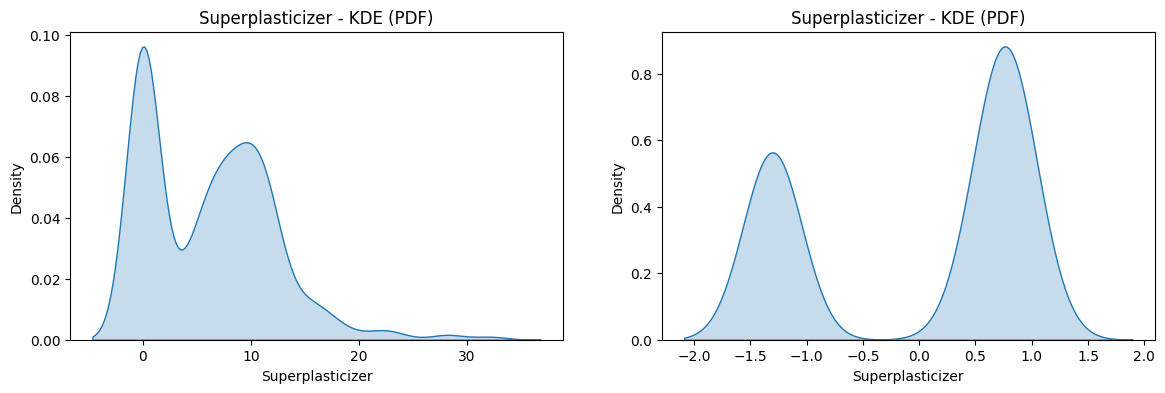

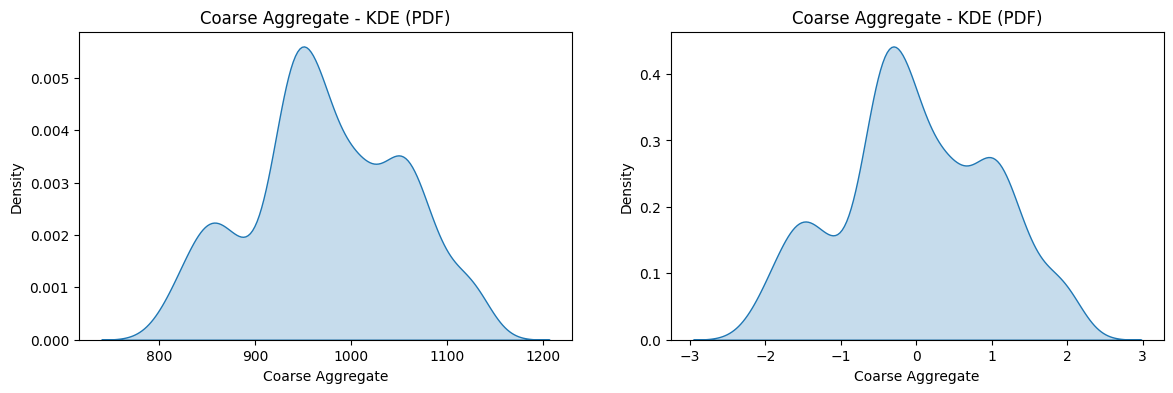

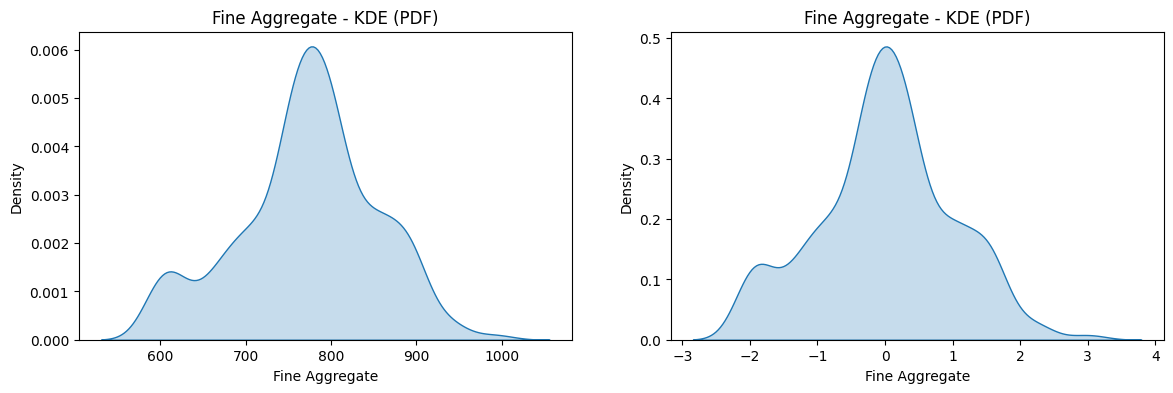

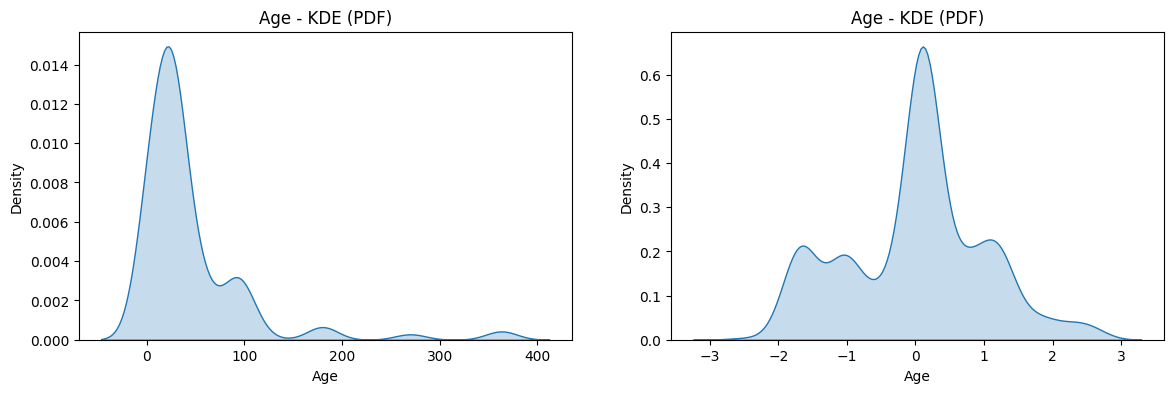

In [54]:
x_train_trans = pd.DataFrame(x_train_trans,columns=x_train.columns)

for col in x_train_trans.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x=x_train[col], fill=True)
    plt.xlabel(col)
    plt.title(f'{col} - KDE (PDF)')
    
    plt.subplot(122)
    sns.kdeplot(x=x_train_trans[col], fill=True)
    plt.xlabel(col)
    plt.title(f'{col} - KDE (PDF)')
    
    plt.show()

In [55]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(x_train)
X_test_transformed2 = pt1.transform(x_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':x_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906511066099


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [56]:
# applying cross val score

pt = PowerTransformer()
x_transformed2 = pt.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed2,y,scoring='r2'))

np.float64(0.6834625126992433)

In [57]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=x_train.columns)

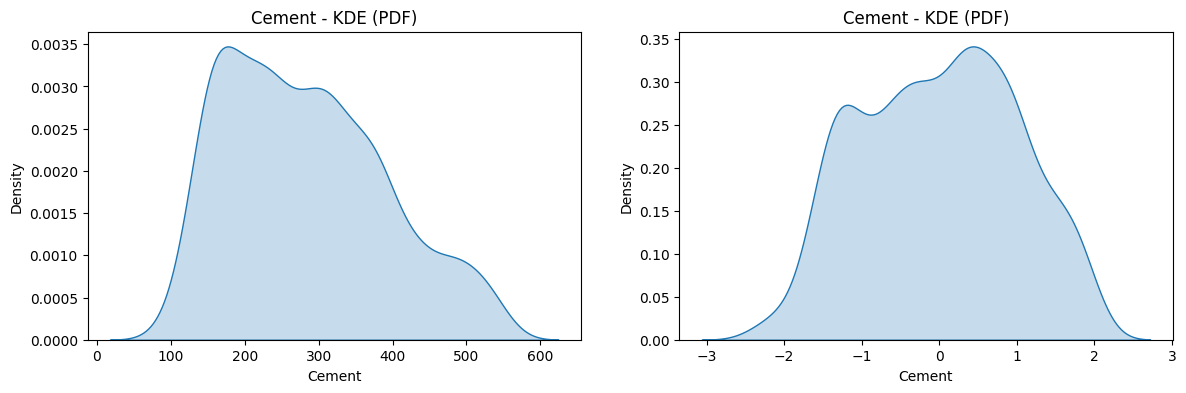

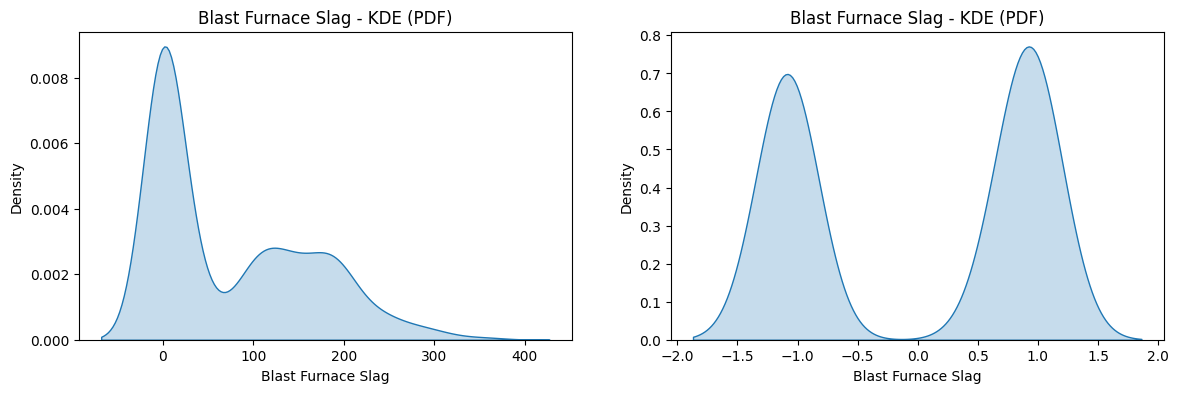

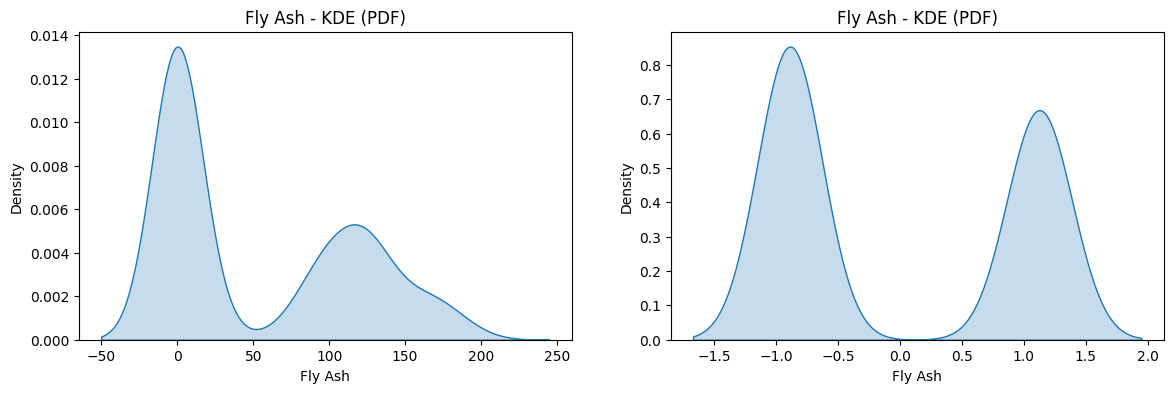

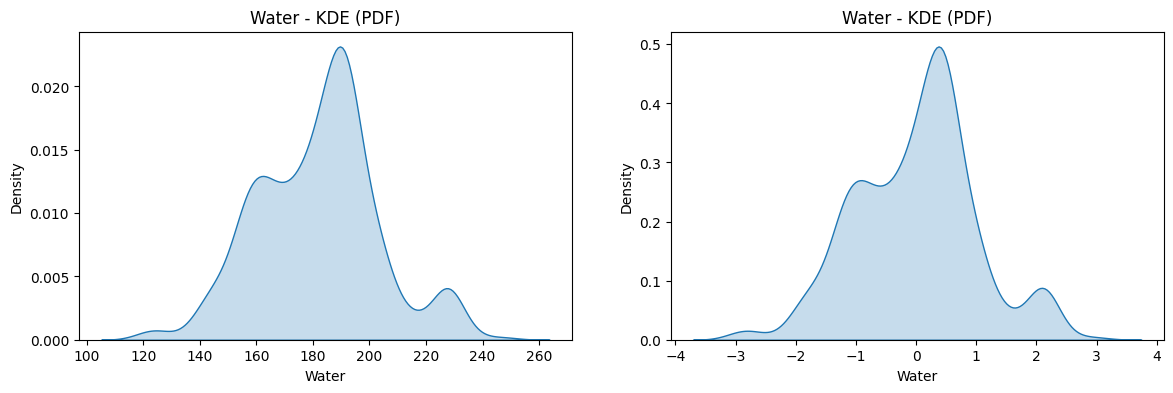

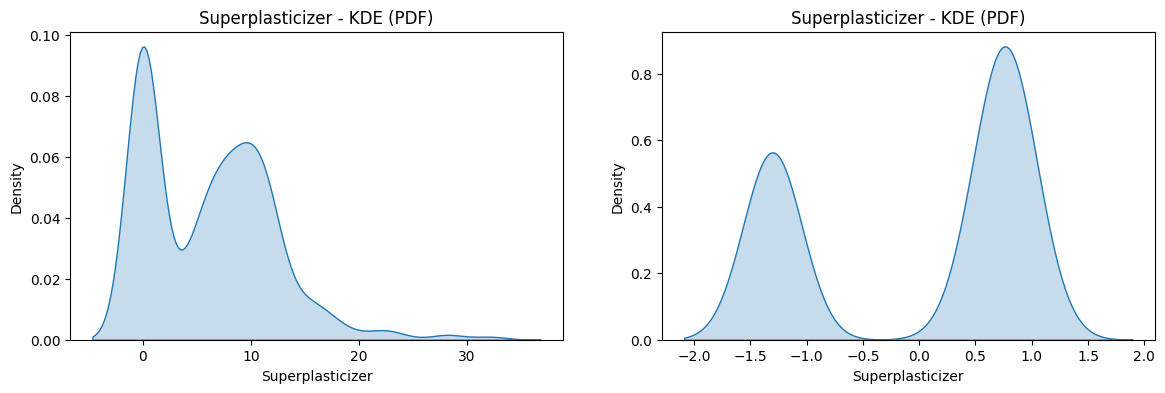

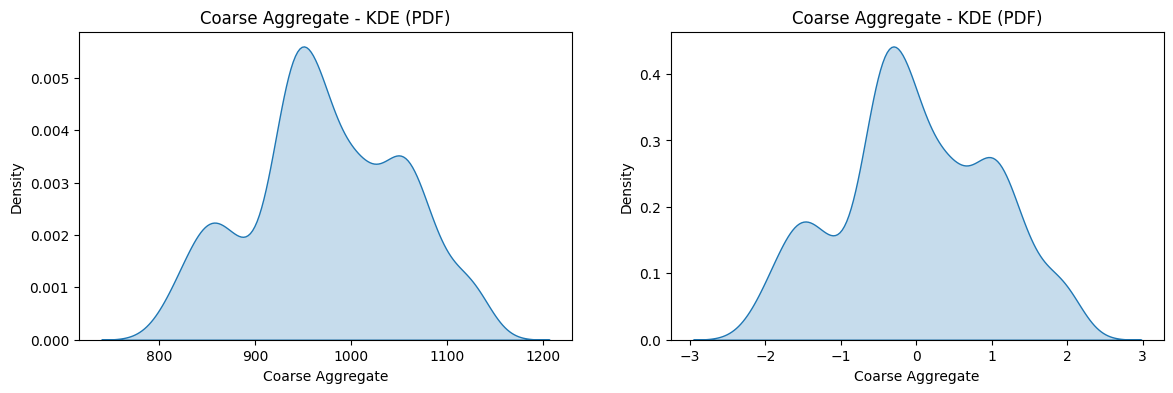

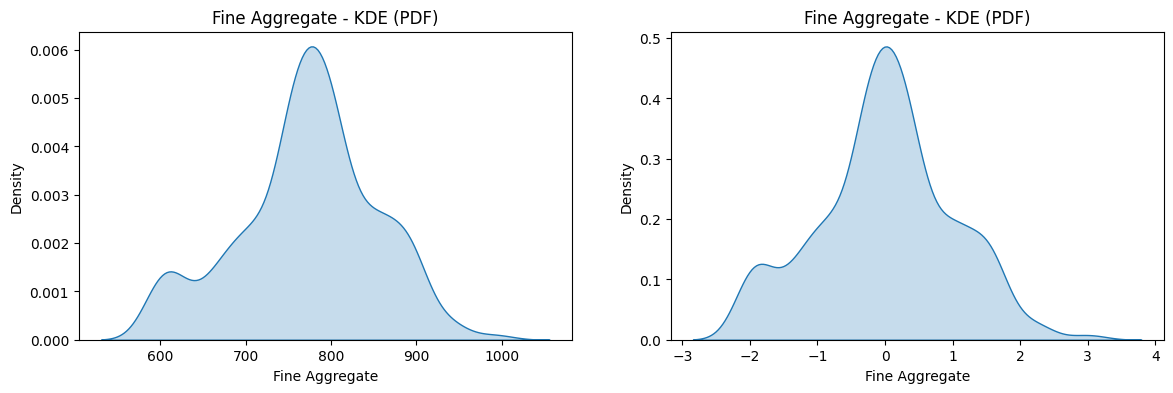

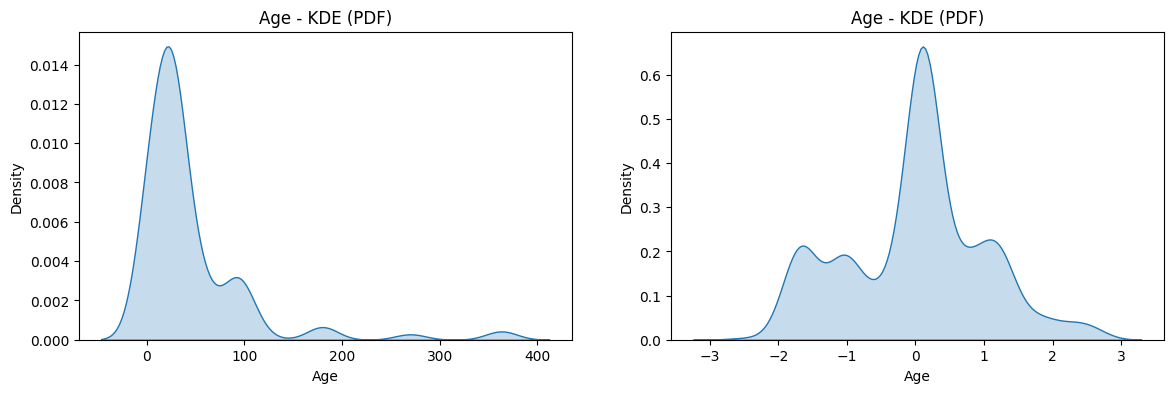

In [58]:
# Before and after comparision for Yeo-Johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x=x_train[col], fill=True)
    plt.xlabel(col)
    plt.title(f'{col} - KDE (PDF)')
    
    plt.subplot(122)
    sns.kdeplot(x=x_train_trans[col], fill=True)
    plt.xlabel(col)
    plt.title(f'{col} - KDE (PDF)')

In [59]:
# Side by side Lambdas
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830764,1.783100
7,Age,0.001771,0.019885
